In [1]:
# !pip install scikit-learn
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib
# Windows용 한글 폰트 설정 (맑은 고딕)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 한글폰트 예시
plt.rcParams['axes.unicode_minus'] = True  # 음수 기호 제대로 표시 설정

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('train_subway21.csv')  # 파일 경로에 맞게 수정

# 데이터 상위 5개 행 확인
df.head()

,Unnamed: 0,train_subway21.tm,train_subway21.line,train_subway21.station_number,train_subway21.station_name,train_subway21.direction,train_subway21.stn,train_subway21.ta,train_subway21.wd,train_subway21.ws,train_subway21.rn_day,train_subway21.rn_hr1,train_subway21.hm,train_subway21.si,train_subway21.ta_chi,train_subway21.congestion
0,1,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,3,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,4,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,5,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# tm 컬럼을 datetime으로 변환
df['datetime'] = pd.to_datetime(df['train_subway21.tm'], format='%Y%m%d%H')

# datetime을 인덱스로 설정
df = df.set_index('datetime')
df1=df.head(7643)

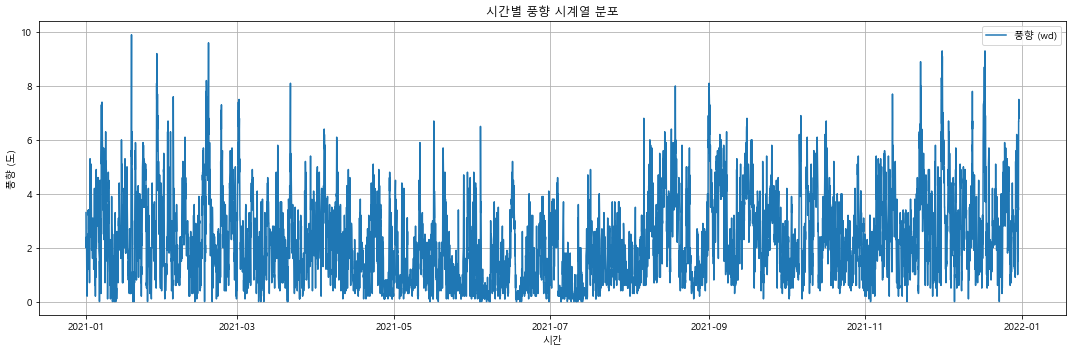

In [11]:
# wd의 시계열 분포 시각화
df1 = df1[df1['train_subway21.ws'] > -5]  # -99 등 이상치 제외
plt.figure(figsize=(15, 5))
plt.plot(df1['train_subway21.ws'], label='풍향 (wd)')
plt.title('시간별 풍향 시계열 분포')
plt.xlabel('시간')
plt.ylabel('풍향 (도)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

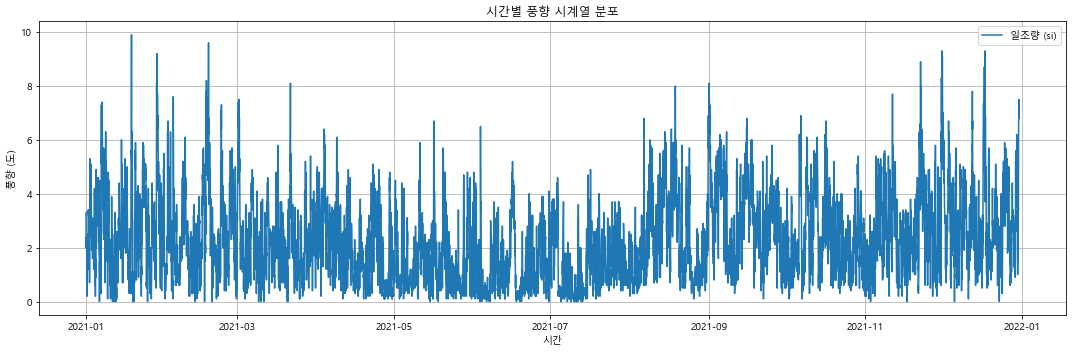

In [12]:
# 일 강수량의 시계열 분포 시각화
df2 = df1[df1['train_subway21.si'] > -1]  # -99 등 이상치 제외
plt.figure(figsize=(15, 5))
plt.plot(df1['train_subway21.ws'], label='일조량 (si)')
plt.title('시간별 풍향 시계열 분포')
plt.xlabel('시간')
plt.ylabel('풍향 (도)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
# 조건에 해당하는 컬럼만 필터링
cols_with_special_values = df.columns[
    df.isin([-99, -9.9]).any()
]

print("다음 컬럼에 -99 또는 -9.9 값이 포함되어 있음:")
print(cols_with_special_values.tolist())

다음 컬럼에 -99 또는 -9.9 값이 포함되어 있음:
['train_subway21.ta', 'train_subway21.wd', 'train_subway21.ws', 'train_subway21.rn_day', 'train_subway21.rn_hr1', 'train_subway21.hm', 'train_subway21.si', 'train_subway21.ta_chi']


In [4]:
rows_with_special_values = df[df.isin([-99, -9.9]).any(axis=1)]
rows_with_special_values

,Unnamed: 0,train_subway21.tm,train_subway21.line,train_subway21.station_number,train_subway21.station_name,train_subway21.direction,train_subway21.stn,train_subway21.ta,train_subway21.wd,train_subway21.ws,train_subway21.rn_day,train_subway21.rn_hr1,train_subway21.hm,train_subway21.si,train_subway21.ta_chi,train_subway21.congestion
0,1,2021010100,1,150,서울역,상선,419,-9.6,291.1,3.3,0.0,0.0,-99.0,-99.0,-12.6,0
1,2,2021010101,1,150,서울역,상선,419,-9.7,284.6,2.0,0.0,0.0,-99.0,-99.0,-9.8,0
2,3,2021010105,1,150,서울역,상선,419,-9.3,124.7,2.4,0.0,0.0,-99.0,-99.0,-10.3,1
3,4,2021010106,1,150,서울역,상선,419,-9.3,126.2,1.7,0.0,0.0,-99.0,-99.0,-10.1,2
4,5,2021010107,1,150,서울역,상선,419,-9.1,145.7,1.3,0.0,0.0,-99.0,-99.0,-9.7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452138,5452139,2021123119,8,2828,남위례,하선,572,-5.1,303.3,1.1,0.0,0.0,24.0,-99.0,-5.5,0
5452139,5452140,2021123120,8,2828,남위례,하선,572,-5.6,307.8,0.8,0.0,0.0,26.0,-99.0,-5.9,0
5452140,5452141,2021123121,8,2828,남위례,하선,572,-5.8,310.1,1.4,0.0,0.0,27.3,-99.0,-6.4,0
5452141,5452142,2021123122,8,2828,남위례,하선,572,-6.3,300.3,1.2,0.0,0.0,27.7,-99.0,-6.8,0


In [4]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5452143 entries, 0 to 5452142
Data columns (total 16 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   Unnamed: 0                     int64  
 1   train_subway21.tm              int64  
 2   train_subway21.line            int64  
 3   train_subway21.station_number  int64  
 4   train_subway21.station_name    object 
 5   train_subway21.direction       object 
 6   train_subway21.stn             int64  
 7   train_subway21.ta              float64
 8   train_subway21.wd              float64
 9   train_subway21.ws              float64
 10  train_subway21.rn_day          float64
 11  train_subway21.rn_hr1          float64
 12  train_subway21.hm              float64
 13  train_subway21.si              float64
 14  train_subway21.ta_chi          float64
 15  train_subway21.congestion      int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 665.5+ MB


In [5]:
# 기술 통계 확인
df.describe(include='all')

,Unnamed: 0,train_subway21.tm,train_subway21.line,train_subway21.station_number,train_subway21.station_name,train_subway21.direction,train_subway21.stn,train_subway21.ta,train_subway21.wd,train_subway21.ws,train_subway21.rn_day,train_subway21.rn_hr1,train_subway21.hm,train_subway21.si,train_subway21.ta_chi,train_subway21.congestion
count,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5452143,5452143,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06,5.452143e+06
unique,NaN,NaN,NaN,NaN,318,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,종로3가,상선,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,45990,2388812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.726072e+06,2.021067e+09,4.099157e+00,1.708757e+03,NaN,NaN,4.282752e+02,1.240768e+01,1.759261e+02,3.443813e-01,-6.823086e-01,-2.095297e+00,4.372865e+01,-3.523759e+01,1.415026e+01,1.847794e+01
std,1.573898e+06,3.446176e+04,2.202769e+00,1.173059e+03,NaN,NaN,1.416229e+02,1.685364e+01,1.073258e+02,1.160278e+01,1.594124e+01,1.471437e+01,5.792867e+01,4.811104e+01,1.187800e+01,1.714034e+01
min,1.000000e+00,2.021010e+09,1.000000e+00,1.500000e+02,NaN,NaN,9.800000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,1.363036e+06,2.021040e+09,2.000000e+00,4.100000e+02,NaN,NaN,4.070000e+02,5.800000e+00,8.310000e+01,8.000000e-01,0.000000e+00,0.000000e+00,4.030000e+01,-9.900000e+01,5.600000e+00,6.000000e+00
50%,2.726072e+06,2.021070e+09,4.000000e+00,1.907000e+03,NaN,NaN,4.180000e+02,1.450000e+01,1.840000e+02,1.400000e+00,0.000000e+00,0.000000e+00,5.990000e+01,1.400000e-01,1.530000e+01,1.500000e+01
75%,4.089108e+06,2.021100e+09,6.000000e+00,2.632000e+03,NaN,NaN,4.340000e+02,2.260000e+01,2.683000e+02,2.300000e+00,0.000000e+00,0.000000e+00,7.890000e+01,1.180000e+00,2.420000e+01,2.600000e+01


In [6]:
# 결측치 확인 -> 결측치 없음
df.isnull().sum()

Unnamed: 0                       0
train_subway21.tm                0
train_subway21.line              0
train_subway21.station_number    0
train_subway21.station_name      0
train_subway21.direction         0
train_subway21.stn               0
train_subway21.ta                0
train_subway21.wd                0
train_subway21.ws                0
train_subway21.rn_day            0
train_subway21.rn_hr1            0
train_subway21.hm                0
train_subway21.si                0
train_subway21.ta_chi            0
train_subway21.congestion        0
dtype: int64

In [7]:
# 중복 데이터 확인
df.duplicated().sum()

0

In [8]:
# 각 컬럼별 데이터 타입 확인
df.dtypes

Unnamed: 0                         int64
train_subway21.tm                  int64
train_subway21.line                int64
train_subway21.station_number      int64
train_subway21.station_name       object
train_subway21.direction          object
train_subway21.stn                 int64
train_subway21.ta                float64
train_subway21.wd                float64
train_subway21.ws                float64
train_subway21.rn_day            float64
train_subway21.rn_hr1            float64
train_subway21.hm                float64
train_subway21.si                float64
train_subway21.ta_chi            float64
train_subway21.congestion          int64
dtype: object

In [9]:
# 범주형 변수 고유값 확인
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()}개 - {df[col].unique()[:5]}...")

train_subway21.station_name: 318개 - ['서울역' '시청' '종각' '종로3가' '종로5가']...
train_subway21.direction: 4개 - ['상선' '하선' '내선' '외선']...


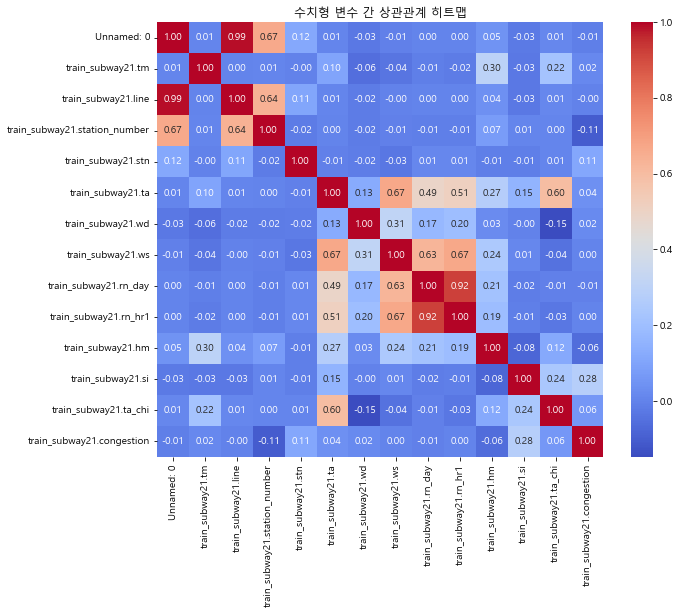

In [10]:
# 수치형 변수 간 상관관계 히트맵
df_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("수치형 변수 간 상관관계 히트맵")
plt.show()

다중공선성: (일 강수량, 1h 강수량) - 0.92

강한 상관관계(+): (호선, 역 번호), (기온, 풍속), (풍속, 일강수량), (풍속, 1h강수량), (기온, 체감온도), (기온, 1h강수량), (기온, 일강수량)

약한 상관관계(+): (일시, 상대습도), (일시, 체감온도), (풍향, 풍속), (풍향, 1h강수량), (기온, 상대습도), (풍속, 상대습도), (일강수량, 상대습도), (1h강수량, 상대습도), (일조량, 체감온도), (일조량, 혼잡도)

약한 상관관계(-): (체감온도, 풍향), (혼잡도, 역 번호)

**강한 상관관계: |0.5| 이상
**중간 상관관계: |0.3|-|0.5|
**약한 상관관계(+): 0.3 이상 (부의 상관관계는 -0.1 포함)
**unnamed:0 제외


<AxesSubplot:xlabel='train_subway21.ta', ylabel='Count'>

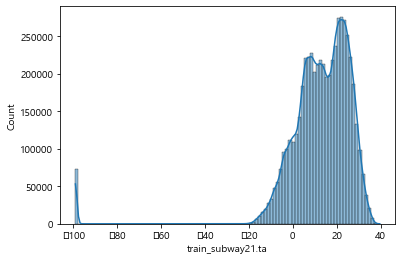

In [16]:
sns.histplot(data=df, x="train_subway21.ta", bins=100, kde=True)

In [ ]:
sns.boxplot(x=df['col'])